# Genearte Figure 5 and Table 1
Write by Alex Tong

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scprep
import pandas as pd

In [2]:
data = np.load("../data/eb_velocity_v5.npz")
data = data["pcs"][:,:5]

In [3]:
zs = np.load('../data/backward_trajectories.npy')

<AxesSubplot:>

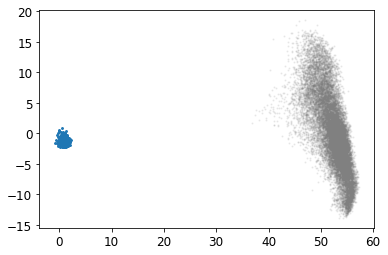

In [4]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(data, c='Gray', alpha=0.1, ax=ax)
scprep.plot.scatter2d(zs[-1], ax=ax)

In [5]:
zs.shape

(100, 3332, 5)

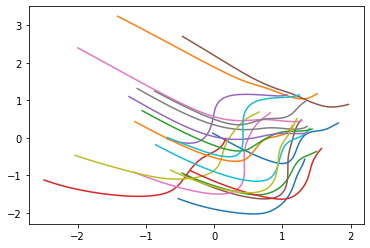

In [6]:
for i in range(20):
    plt.plot(zs[:,i,0], zs[:,i,4])

In [7]:
EBT_counts = pd.read_pickle('../data/eb_old_filter.pickle')
#sample_labels = pd.read_pickle('/home/atong/data/preprocessed_ebt_counts_labels.pkl')

In [8]:
sample_labels = EBT_counts["samples"]
EBT_counts = EBT_counts.drop(columns=["samples"])

In [9]:
EBT_counts

A1BG (ENSG00000121410)  \
AAACCGTGCAGAAA-1_Day 00-03                0.000000   
AAACGCACCGGTAT-1_Day 00-03                0.000000   
AAACGCACCTATTC-1_Day 00-03                0.000000   
AAAGATCTCTGCTC-1_Day 00-03                0.000000   
AAAGATCTGGTACT-1_Day 00-03                0.000000   
...                                            ...   
TTTCGAACTTCTCA-1_Day 24-27                0.000000   
TTTCTACTCTTATC-1_Day 24-27                0.000000   
TTTCTACTTGAGCT-1_Day 24-27                2.071677   
TTTGCATGATGACC-1_Day 24-27                0.000000   
TTTGCATGTTCTTG-1_Day 24-27                0.000000   

                            A1BG-AS1 (ENSG00000268895)  A2M (ENSG00000175899)  \
AAACCGTGCAGAAA-1_Day 00-03                         0.0                    0.0   
AAACGCACCGGTAT-1_Day 00-03                         0.0                    0.0   
AAACGCACCTATTC-1_Day 00-03                         0.0                    0.0   
AAAGATCTCTGCTC-1_Day 00-03                         0.0                    0.0   
AAAGATCTGGTACT-1_Day 00-03                         0.0                    0.0   
...                                                ...                    ...   
TTTCGAACTTCTCA-1_Day 24-27                         0.0                    0.0   
TTTCTACTCTTATC-1_Day 24-27                         0.0                    0.0   
TTTCTACTTGAGCT-1_Day 24-27                         0.0                    0.0   
TTTGCATGATGACC-1_Day 24-27                         0.0                    0.0   
TTTGCATGTTCTTG-1_Day 24-27                         0.0                    0.0   

                            A2M-AS1 (ENSG00000245105)  \
AAACCGTGCAGAAA-1_Day 00-03                   0.000000   
AAACGCACCGGTAT-1_Day 00-03                   0.000000   
AAACGCACCTATTC-1_Day 00-03                   0.000000   
AAAGATCTCTGCTC-1_Day 00-03                   0.000000   
AAAGATCTGGTACT-1_Day 00-03                   0.000000   
...                                               ...   
TTTCGAACTTCTCA-1_Day 24-27                   0.000000   
TTTCTACTCTTATC-1_Day 24-27                   0.000000   
TTTCTACTTGAGCT-1_Day 24-27                   0.000000   
TTTGCATGATGACC-1_Day 24-27                   0.000000   
TTTGCATGTTCTTG-1_Day 24-27                   1.963807   

                            A2ML1 (ENSG00000166535)  A4GALT (ENSG00000128274)  \
AAACCGTGCAGAAA-1_Day 00-03                      0.0                       0.0   
AAACGCACCGGTAT-1_Day 00-03                      0.0                       0.0   
AAACGCACCTATTC-1_Day 00-03                      0.0                       0.0   
AAAGATCTCTGCTC-1_Day 00-03                      0.0                       0.0   
AAAGATCTGGTACT-1_Day 00-03                      0.0                       0.0   
...                                             ...                       ...   
TTTCGAACTTCTCA-1_Day 24-27                      0.0                       0.0   
TTTCTACTCTTATC-1_Day 24-27                      0.0                       0.0   
TTTCTACTTGAGCT-1_Day 24-27                      0.0                       0.0   
TTTGCATGATGACC-1_Day 24-27                      0.0                       0.0   
TTTGCATGTTCTTG-1_Day 24-27                      0.0                       0.0   

                            AAAS (ENSG00000094914)  AACS (ENSG00000081760)  \
AAACCGTGCAGAAA-1_Day 00-03                     0.0                0.000000   
AAACGCACCGGTAT-1_Day 00-03                     0.0                0.000000   
AAACGCACCTATTC-1_Day 00-03                     0.0                0.000000   
AAAGATCTCTGCTC-1_Day 00-03                     0.0                0.000000   
AAAGATCTGGTACT-1_Day 00-03                     0.0                0.000000   
...                                            ...                     ...   
TTTCGAACTTCTCA-1_Day 24-27                     0.0                0.000000   
TTTCTACTCTTATC-1_Day 24-27                     0.0                0.000000   
TTTCTACTTGAGCT-1_Day 24-27                    

In [10]:
import phate
phate_operator = phate.PHATE(n_jobs=-2, random_state=42)
Y_phate = phate_operator.fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 235.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 142.79 seconds.
    Calculating affinities...
    Calculated affinities in 13.06 seconds.
  Calculated graph and diffusion operator in 396.67 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 17.43 seconds.
    Calculating KMeans...
    Calculated KMeans in 236.47 seconds.
  Calculated landmark operator in 262.29 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 66.89 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 97.21 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 101.98 seconds.
Calculated PHATE in 925.09 seconds.


In [16]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(phate_operator.graph.data_nu)

StandardScaler()

In [17]:
zss = zs * scaler.scale_[:5] + scaler.mean_[:5]

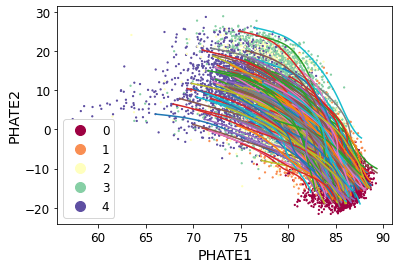

In [18]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(phate_operator.graph.data_nu, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=True, label_prefix="PHATE", ax=ax)

for i in range(200):
    ax.plot(zss[:,i,0], zss[:,i,1])

In [19]:
zss.shape, 

((100, 3332, 5),)

In [20]:
pcs = phate_operator.graph.data_pca.components_[:5]

<AxesSubplot:>

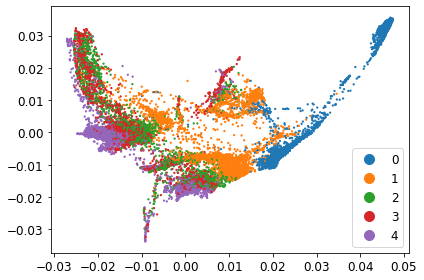

In [21]:
scprep.plot.scatter2d(Y_phate, sample_labels)

In [22]:
end_genes = ['PDGFRA ', 'HAND1', 'SOX17', 'ONECUT2', ]
end_points = ['Muscle', 'Cardiac', 'Endothelial', 'Neuronal',]
#end_genes = [ 'HAND1', 'ONECUT2',]
#end_points = ['Cardiac', 'Neuronal', ]

colors = dict(zip(*[end_genes, [plt.get_cmap('tab10')(i+1) for i in range(len(end_genes))]]))
print(colors)
other_genes = ['GATA6 ', 'SATB1', 'T ', 'EOMES', 'NANOG', 'TNNT2', 'DLX1', 'TBX18', 'MAP2 ']
genes_of_interest = [*other_genes, *end_genes]
genes_of_interest_end = scprep.select.get_gene_set(EBT_counts, starts_with=end_genes)
genes_of_interest_other = scprep.select.get_gene_set(EBT_counts, starts_with=other_genes)
genes_of_interest_full = scprep.select.get_gene_set(EBT_counts, starts_with=genes_of_interest)
print(genes_of_interest_full.shape)
genes_mask = EBT_counts.columns.isin(genes_of_interest_full)

genes = EBT_counts.columns[genes_mask]

inverse = np.dot(zss, phate_operator.graph.data_pca.components_[:5, genes_mask])
end_gene_indexes = [(np.where(genes_of_interest_full == gene)[0][0]) for gene in genes_of_interest_end]


{'PDGFRA ': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 'HAND1': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 'SOX17': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 'ONECUT2': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)}
(13,)


In [23]:
zss.shape, phate_operator.graph.data_pca.components_[:5, genes_mask].shape

((100, 3332, 5), (5, 13))

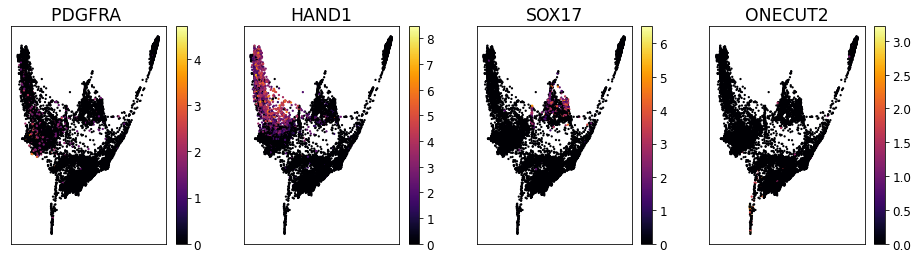

In [24]:
fig, ax = plt.subplots(1,len(end_genes), figsize=(4*len(end_genes),4))
ax = ax.flatten()
for i in range(len(end_genes)):
    scprep.plot.scatter2d(Y_phate, 
                          c=EBT_counts[scprep.select.get_gene_set(EBT_counts, starts_with=end_genes[i])], 
                          ax=ax[i],
                          title=end_genes[i],
                          ticks=[],
                         )

In [25]:
import magic

m_op = magic.MAGIC()
m_op.graph = phate_operator.graph
X_magic = m_op.transform(EBT_counts, genes=genes_of_interest_full)

ModuleNotFoundError: No module named 'magic'

In [ ]:
fig, ax = plt.subplots(1,len(end_genes), figsize=(4*len(end_genes),4))
ax = ax.flatten()
for i in range(len(end_genes)):
    scprep.plot.scatter2d(Y_phate, 
                          c=X_magic[scprep.select.get_gene_set(EBT_counts, starts_with=end_genes[i])], 
                          ax=ax[i],
                          title=end_genes[i],
                          ticks=[],
                         )

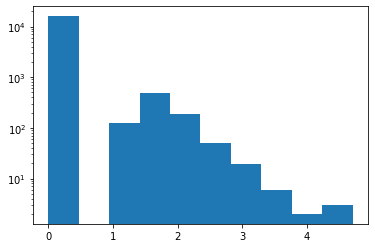

In [26]:
plt.hist(np.array(EBT_counts[scprep.select.get_gene_set(EBT_counts, starts_with='PDGFRA ')]).flatten())
#plt.xscale('log')
plt.yscale('log')

In [27]:
np.sum(np.array(EBT_counts[scprep.select.get_gene_set(EBT_counts, starts_with='PDGFRA ')]) > 0)

879

In [28]:
# end_genes = ['ONECUT2', 'CDX2', 'HAND1', 'PDGFRA ']
# Pick some cells associated with high expression in each gene in TP 5, then use those to go backwards.

zs.shape

(100, 3332, 5)

In [29]:
np.unique(sample_labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2381, 4165, 3278, 3665, 3332]))

In [49]:
EBT_5 = EBT_counts[sample_labels == 4]

In [50]:
EBT_5.shape

(3332, 17845)

In [51]:
for gene in end_genes:
    print(gene, np.sum(np.array(EBT_5[scprep.select.get_gene_set(EBT_counts, starts_with=gene)]) > 0))

PDGFRA  324
HAND1 218
SOX17 12
ONECUT2 10


In [77]:
masks = {}
top_idxs = {}
for gene in end_genes:
    top_idx = np.array(EBT_5[scprep.select.get_gene_set(EBT_counts, starts_with=gene)]).flatten().argsort()[-20:]
    top_mask = np.array(pd.Series(range(3332)).isin(top_idx))
    masks[gene] = top_mask
    top_idxs[gene] = top_idx
    print(gene, top_idx)

PDGFRA  [2330 3001  638  820 3064  544  734 3167 1843 1034 3125 1896 2642  488
  748  664  697 1419  300  432]
HAND1 [2718 1300  259 1025 2694  585  270 3279 3243 2167  292 1959 3195  936
 2133  375  668  501 2484 1476]
SOX17 [1107 1111 1115 1114 1110 1113 1112 1109  753  598  324 2053 2595 2664
 1988 2353 1129 2823  738  532]
ONECUT2 [1105 1107 1108 1109 1110 1111 1112 1113 1106 1097 2785 2920  555 2283
  718 1275 2125 1838 2129 2277]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

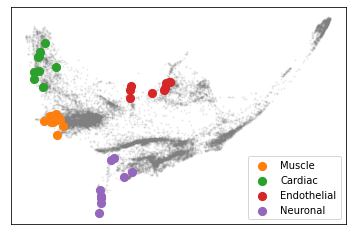

In [53]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(Y_phate, c='Gray', alpha=0.1, ax=ax)
#scprep.plot.scatter2d(Y_phate[sample_labels=='Day 24-27'], ax=ax)
for i, gene in enumerate(end_genes):
    scprep.plot.scatter2d(Y_phate[sample_labels==4][masks[gene]], 
                          ax=ax, c = colors[gene], label=end_points[i], ticks=[])
    
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

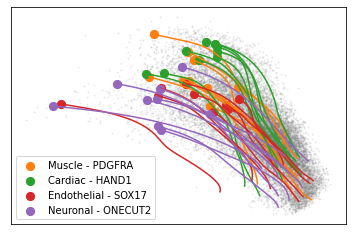

In [54]:


#import matplotlib.
dn = phate_operator.graph.data_nu

fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(dn, c='Gray', alpha=0.1, ax=ax)
#scprep.plot.scatter2d(dn[sample_labels=='Day 24-27'], ax=ax)
for i, gene in enumerate(end_genes):
    #print(colors[gene])
    scprep.plot.scatter2d(dn[sample_labels==4][masks[gene]], ax=ax, 
                          label='%s - %s' % (end_points[i], end_genes[i]), c=colors[gene], ticks=[])

for gene in end_genes:
    for g in top_idxs[gene]:
        ax.plot(zss[:,g,0], zss[:,g,1], c=colors[gene])
plt.legend()

In [58]:
dims = (1,3)
#import matplotlib.
dn = phate_operator.graph.data_nu[:, dims]
dn.shape

(16821, 2)

In [59]:
sample_labels

AAACCGTGCAGAAA-1_Day 00-03    0
AAACGCACCGGTAT-1_Day 00-03    0
AAACGCACCTATTC-1_Day 00-03    0
AAAGATCTCTGCTC-1_Day 00-03    0
AAAGATCTGGTACT-1_Day 00-03    0
                             ..
TTTCGAACTTCTCA-1_Day 24-27    4
TTTCTACTCTTATC-1_Day 24-27    4
TTTCTACTTGAGCT-1_Day 24-27    4
TTTGCATGATGACC-1_Day 24-27    4
TTTGCATGTTCTTG-1_Day 24-27    4
Name: samples, Length: 16821, dtype: int64

In [66]:
end_genes

['PDGFRA ', 'HAND1', 'SOX17', 'ONECUT2']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

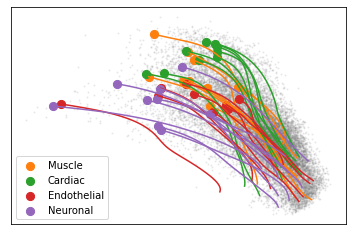

In [57]:
dims = (0,1)
#import matplotlib.
dn = phate_operator.graph.data_nu[:, dims]


fig, ax = plt.subplots(1,1)#, figsize=(20,20))
scprep.plot.scatter2d(dn, c='Gray', alpha=0.1, ax=ax)
#scprep.plot.scatter2d(dn[sample_labels=='Day 24-27'], ax=ax)
for i, gene in enumerate(end_genes):
    #print(colors[gene])
    scprep.plot.scatter2d(dn[sample_labels==4][masks[gene]], ax=ax, 
                          label='%s' % (end_points[i]), c=colors[gene], ticks=[])

for gene in end_genes:
    for g in top_idxs[gene]:
        ax.plot(zss[:,g,dims[0]], zss[:,g,dims[1]], c=colors[gene])
plt.legend()

In [68]:
end_gene_indexes

[3, 6, 7, 9]

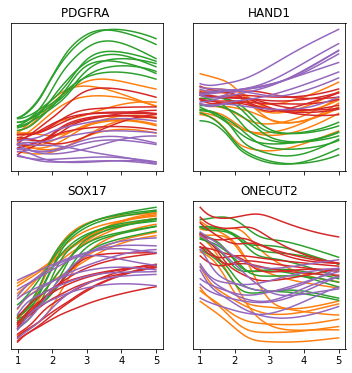

In [60]:
#fig, ax = plt.subplots(3,5, figsize=(20,12))
fig, ax = plt.subplots(2,2, figsize=(6,6), sharex=True)
ax = ax.flatten()

for i, gene in enumerate(end_genes):
    for j, eg in enumerate(end_genes):
        for g in top_idxs[eg]:
            #print(genes_of_interest_full[end_gene_indexes[i]])
            ax[i].plot(np.linspace(1,5,100)[::-1], inverse[:,g,end_gene_indexes[i]], c=colors[eg])
            ax[i].set_title(gene)
            ax[i].set_yticks([])
            ax[i].set_xticks(range(1,6))
        #ax[i].set_xticks()

In [62]:
top_idxs

{'PDGFRA ': array([1896, 2642,  488,  748,  664,  697, 1419,  300,  432]),
 'HAND1': array([1959, 3195,  936, 2133,  375,  668,  501, 2484, 1476]),
 'SOX17': array([2053, 2595, 2664, 1988, 2353, 1129, 2823,  738,  532]),
 'ONECUT2': array([2920,  555, 2283,  718, 1275, 2125, 1838, 2129, 2277])}

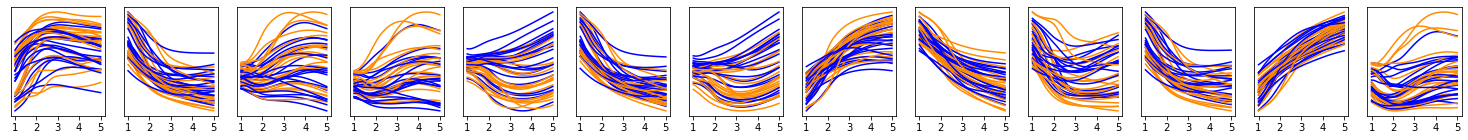

In [83]:
fig, ax = plt.subplots(1,13, figsize=(26,2))
#fig, ax = plt.subplots(2,2, figsize=(6,6), sharex=True)
ax = ax.flatten()

for i, gene in enumerate(genes):
    eg = "ONECUT2"
    for j, g in enumerate(top_idxs[eg]):
        ax[i].plot(np.linspace(1,5,100)[::-1], inverse[:,j,i], c="darkorange")
        ax[i].plot(np.linspace(1,5,100)[::-1], inverse[:,g,i], c="blue")
        #ax[i].set_title(gene.split()[0])
        ax[i].set_yticks([])
        ax[i].set_xticks(range(1,6))
        #ax[i].set_xticks()
plt.savefig("tmp.png", dpi=300)

In [84]:
import pandas as pd


In [89]:
df = pd.read_excel("../data/runtime_holdout_data.xlsx")

In [98]:
df

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3       Unnamed: 4  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         NaN         NaN         NaN         NaN              NaN   
3         NaN         NaN         NaN         NaN        EMD-Petal   
4         NaN         NaN         NaN         NaN        MMD-Petal   
5         NaN         NaN         NaN         NaN    Runtime-Petal   
6         NaN         NaN         NaN         NaN     EMD - Dyngen   
7         NaN         NaN         NaN         NaN     MMD - Dyngen   
8         NaN         NaN         NaN         NaN  Runtime -Dyngen   

      Unnamed: 5  Unnamed: 6      Unnamed: 7  
0            NaN         NaN             NaN  
1            NaN         NaN             NaN  
2  TrajectoryNet         DSB   MIOFlow(ours)  
3          1.697       2.923           1.605  
4          9.513       9.579           9.345  
5     64 minutes  86 minutes  284.60 seconds  
6          1.809       2.251           0.756  
7           7.32      21.454           7.674  
8     62 minutes  81 minutes   95.63 seconds

In [95]:
ddf = df.iloc[3:, 5:]

In [96]:
ddf

Unnamed: 5  Unnamed: 6      Unnamed: 7
3       1.697       2.923           1.605
4       9.513       9.579           9.345
5  64 minutes  86 minutes  284.60 seconds
6       1.809       2.251           0.756
7        7.32      21.454           7.674
8  62 minutes  81 minutes   95.63 seconds

In [100]:
ddf.columns = ["TrajectoryNet", "DSB", "MIOFlow (ours)"]

In [101]:
ddf

TrajectoryNet         DSB  MIOFlow (ours)
3         1.697       2.923           1.605
4         9.513       9.579           9.345
5    64 minutes  86 minutes  284.60 seconds
6         1.809       2.251           0.756
7          7.32      21.454           7.674
8    62 minutes  81 minutes   95.63 seconds

In [108]:
ddf.index = df.iloc[3:, 4]
ddf.index.name = ""

In [111]:
print(ddf.to_latex())

\begin{tabular}{llll}
\toprule
{} & TrajectoryNet &         DSB &  MIOFlow (ours) \\
                &               &             &                 \\
\midrule
EMD-Petal       &         1.697 &       2.923 &           1.605 \\
MMD-Petal       &         9.513 &       9.579 &           9.345 \\
Runtime-Petal   &    64 minutes &  86 minutes &  284.60 seconds \\
EMD - Dyngen    &         1.809 &       2.251 &           0.756 \\
MMD - Dyngen    &          7.32 &      21.454 &           7.674 \\
Runtime -Dyngen &    62 minutes &  81 minutes &   95.63 seconds \\
\bottomrule
\end{tabular}



/tmp/ipykernel_808/1703619417.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ddf.to_latex())


MultiIndex([( 'Petal',     'EMD'),
            ( 'Petal',     'MMD'),
            ( 'Petal', 'Runtime'),
            ('Dyngen',     'EMD'),
            ('Dyngen',     'MMD'),
            ('Dyngen', 'Runtime')],
           )

In [116]:
ddf.index = pd.MultiIndex.from_product([("Petal", "Dyngen"), ("EMD", "MMD", "Runtime")])

In [120]:
print(ddf.T.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{Petal} & \multicolumn{3}{l}{Dyngen} \\
{} &    EMD &    MMD &         Runtime &    EMD &     MMD &        Runtime \\
\midrule
TrajectoryNet  &  1.697 &  9.513 &      64 minutes &  1.809 &    7.32 &     62 minutes \\
DSB            &  2.923 &  9.579 &      86 minutes &  2.251 &  21.454 &     81 minutes \\
MIOFlow (ours) &  1.605 &  9.345 &  284.60 seconds &  0.756 &   7.674 &  95.63 seconds \\
\bottomrule
\end{tabular}



/tmp/ipykernel_808/2624526070.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ddf.T.to_latex())


In [88]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 4.3 MB/s            
